# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [2]:
# import libraries
import pandas as pd
pd.set_option("max_colwidth", 500)
from sqlalchemy import create_engine

In [3]:
import datetime

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [5]:
# load data from database
engine = create_engine('sqlite:///la_udacity_project.db')
query = "SELECT * FROM disaster_response_data"
df = pd.read_sql_query(query, engine)


In [6]:
df.shape

(26216, 40)

In [9]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)
genre_names

['direct', 'news', 'social']

<AxesSubplot:xlabel='genre'>

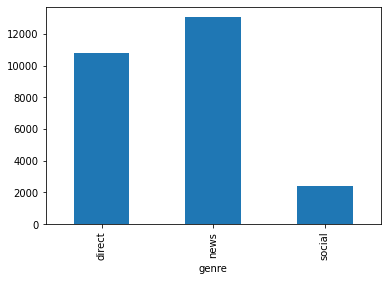

In [11]:
genre_counts.plot(kind = 'bar')

In [12]:
class_counts = df.drop(columns = ['id', 'message', 'original', 'genre', 'related']).sum(axis = 0).sort_values(ascending = False)
class_names = list(class_counts.index)
class_names

['aid_related',
 'weather_related',
 'direct_report',
 'request',
 'other_aid',
 'food',
 'earthquake',
 'storm',
 'shelter',
 'floods',
 'medical_help',
 'infrastructure_related',
 'water',
 'other_weather',
 'buildings',
 'medical_products',
 'transport',
 'death',
 'other_infrastructure',
 'refugees',
 'military',
 'search_and_rescue',
 'money',
 'electricity',
 'cold',
 'security',
 'clothing',
 'aid_centers',
 'missing_people',
 'hospitals',
 'fire',
 'tools',
 'shops',
 'offer',
 'child_alone']

In [13]:
# check for null messages
df['message'].isna().sum()

0

In [14]:
# check for empty messages
df['len'] = df['message'].str.len()
df[df.len == 0].head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,len


In [15]:
df = df.drop(columns = ['len'])

In [16]:
df['genre'].value_counts()

news      13054
direct    10766
social     2396
Name: genre, dtype: int64

In [17]:
df['related'].value_counts()

1    19906
0     6122
2      188
Name: related, dtype: int64

In [18]:
df[df.related > 1] = 1

In [19]:
df['related'].value_counts()

1    20094
0     6122
Name: related, dtype: int64

In [20]:
df.nunique()

id                        25994
message                   25991
original                   9508
genre                         4
related                       2
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
child_alone                   2
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_in

In [351]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Additional transformations on the text to improve results

In [21]:
df.dtypes

id                         int64
message                   object
original                  object
genre                     object
related                    int64
request                    int64
offer                      int64
aid_related                int64
medical_help               int64
medical_products           int64
search_and_rescue          int64
security                   int64
military                   int64
child_alone                int64
water                      int64
food                       int64
shelter                    int64
clothing                   int64
money                      int64
missing_people             int64
refugees                   int64
death                      int64
other_aid                  int64
infrastructure_related     int64
transport                  int64
buildings                  int64
electricity                int64
tools                      int64
hospitals                  int64
shops                      int64
aid_center

In [22]:
# convert characters to lowercase
def lowercase(pdf, col):
    pdf[col]=pdf[col].apply(lambda x: str(x).lower())
    return pdf
df = lowercase(df, 'message')

### define X and Y

In [24]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [25]:
X = df['message'].values
Y = df.drop(columns = ['id', 'message', 'original', 'genre']).values

### 2. Write a tokenization function to process your text data

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arjunanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [28]:
stopwords_nltk = list(stopwords.words("english"))
combined_stopwords = stopwords_nltk

In [29]:
def tokenize(text):
    """
    Splits text into tokens
    
    Arguments:
    text (str): text to split
    Returns:
    tokens (list): list of tokens in the text
    
    """
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize 
    from nltk.stem.wordnet import WordNetLemmatizer

    stop_words = stopwords.words("english")
    # convert text to lowercase
    text = text.lower()
    
    # remove punctuation
    import re
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    
    words = word_tokenize(text) 

    words = [w for w in words if w not in stop_words] 
    
    lemmatizer = WordNetLemmatizer()    
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return tokens

In [30]:
X[100]

'the message might be saying that they have been stuck in the presidential palace ( pal ) since the same tuesday ( as the quake ). they need water. the message says they are not finding a little water. no names, no number of people given.'

In [31]:
# test tokenization function
x0_tokens= tokenize(X[100])

In [32]:
x0_tokens

['message',
 'might',
 'saying',
 'stuck',
 'presidential',
 'palace',
 'pal',
 'since',
 'tuesday',
 'quake',
 'need',
 'water',
 'message',
 'say',
 'finding',
 'little',
 'water',
 'name',
 'number',
 'people',
 'given']

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer(smooth_idf=False))
        ])),
    ])),

    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [34]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [35]:
# split X and Y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [36]:
# check that the test and train split both have samples with every class
def check_unique_labels(array):
    import numpy as np
    unique_values = np.apply_along_axis(np.unique, axis=0, arr=array)
    # Print the unique values in each column
    for col_idx, col_values in enumerate(unique_values.T):
        print(f"Column {col_idx+1}: {col_values}")


In [37]:
y_train.shape

(19662, 36)

In [38]:
check_unique_labels(y_train)

Column 1: [0 1]
Column 2: [0 1]
Column 3: [0 1]
Column 4: [0 1]
Column 5: [0 1]
Column 6: [0 1]
Column 7: [0 1]
Column 8: [0 1]
Column 9: [0 1]
Column 10: [0 1]
Column 11: [0 1]
Column 12: [0 1]
Column 13: [0 1]
Column 14: [0 1]
Column 15: [0 1]
Column 16: [0 1]
Column 17: [0 1]
Column 18: [0 1]
Column 19: [0 1]
Column 20: [0 1]
Column 21: [0 1]
Column 22: [0 1]
Column 23: [0 1]
Column 24: [0 1]
Column 25: [0 1]
Column 26: [0 1]
Column 27: [0 1]
Column 28: [0 1]
Column 29: [0 1]
Column 30: [0 1]
Column 31: [0 1]
Column 32: [0 1]
Column 33: [0 1]
Column 34: [0 1]
Column 35: [0 1]
Column 36: [0 1]


In [39]:
check_unique_labels(y_test)

Column 1: [0 1]
Column 2: [0 1]
Column 3: [0 1]
Column 4: [0 1]
Column 5: [0 1]
Column 6: [0 1]
Column 7: [0 1]
Column 8: [0 1]
Column 9: [0 1]
Column 10: [0 1]
Column 11: [0 1]
Column 12: [0 1]
Column 13: [0 1]
Column 14: [0 1]
Column 15: [0 1]
Column 16: [0 1]
Column 17: [0 1]
Column 18: [0 1]
Column 19: [0 1]
Column 20: [0 1]
Column 21: [0 1]
Column 22: [0 1]
Column 23: [0 1]
Column 24: [0 1]
Column 25: [0 1]
Column 26: [0 1]
Column 27: [0 1]
Column 28: [0 1]
Column 29: [0 1]
Column 30: [0 1]
Column 31: [0 1]
Column 32: [0 1]
Column 33: [0 1]
Column 34: [0 1]
Column 35: [0 1]
Column 36: [0 1]


In [40]:
print("train start time: ", datetime.datetime.now())
pipeline.fit(X_train, y_train)
print("train end time: ", datetime.datetime.now())

train start time:  2024-05-20 17:26:32.192801
train end time:  2024-05-20 17:36:25.708106


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [41]:
def calculate_model_metrics(X_test, y_test, y_pred):
    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    
    # accuracy for each class
    accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    print("Accuracy for each output:", accuracies)

In [42]:
# metrics on train
y_train_pred = pipeline.predict(X_train)

In [43]:
calculate_model_metrics(X_train, y_train, y_train_pred)

Accuracy: 0.994405452141186
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15060
           1       1.00      1.00      1.00      3487
           2       1.00      1.00      1.00       208
           3       1.00      1.00      1.00      8205
           4       1.00      1.00      1.00      1657
           5       1.00      0.99      1.00      1101
           6       1.00      1.00      1.00       678
           7       1.00      0.99      1.00       491
           8       1.00      1.00      1.00       783
           9       1.00      1.00      1.00       133
          10       1.00      1.00      1.00      1378
          11       1.00      1.00      1.00      2287
          12       1.00      1.00      1.00      1857
          13       1.00      1.00      1.00       435
          14       1.00      1.00      1.00       588
          15       1.00      1.00      1.00       353
          16       1.00      1

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# metrics on test
y_pred = pipeline.predict(X_test)

In [45]:
calculate_model_metrics(X_test, y_test, y_pred)

Accuracy: 0.27586206896551724
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5034
           1       0.86      0.55      0.67      1175
           2       1.00      0.56      0.72        98
           3       0.77      0.69      0.73      2843
           4       0.81      0.16      0.27       615
           5       0.89      0.23      0.37       400
           6       0.93      0.29      0.45       234
           7       0.96      0.33      0.49       168
           8       0.93      0.25      0.39       265
           9       1.00      1.00      1.00        55
          10       0.91      0.45      0.60       482
          11       0.87      0.65      0.74       824
          12       0.87      0.44      0.59       645
          13       0.93      0.42      0.58       158
          14       0.98      0.30      0.46       204
          15       0.98      0.42      0.59       133
          16       0.98     

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Improve your model
Use grid search to find better parameters. 

In [378]:
pipeline.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('text_pipeline',
                                   Pipeline(steps=[('vect',
                                                    CountVectorizer(tokenizer=<function tokenize at 0x7fb6f14fc8c8>)),
                                                   ('tfidf',
                                                    TfidfTransformer(smooth_idf=False))]))])),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'features': FeatureUnion(transformer_list=[('text_pipeline',
                                 Pipeline(steps=[('vect',
                                                  CountVectorizer(tokenizer=<function tokenize at 0x7fb6f14fc8c8>)),
                                                 ('tfidf',
                                                  TfidfTransformer(smooth_idf=False))]))]),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'features__n_jobs': None,


In [379]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'features__text_pipeline__vect__ngram_range': ((1, 1), (1, 2)),
    'clf__estimator__n_estimators': [50, 100],
    'clf__estimator__min_samples_split': [5, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters) #n_jobs = -1)

In [ ]:
import datetime
print("start time: ", datetime.datetime.now())
cv.fit(X_train, y_train)
print("end_time: ", datetime.datetime.now())

start time:  2024-05-19 19:12:17.869808


In [398]:
print("\nBest Parameters:", cv.best_params_)


Best Parameters: {'clf__estimator__min_samples_split': 5, 'clf__estimator__n_estimators': 100, 'features__text_pipeline__vect__ngram_range': (1, 2)}


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [394]:
best_estimator = cv.best_estimator_

In [395]:
type(best_estimator)

sklearn.pipeline.Pipeline

In [396]:
# check performance on train vs test 
y_pred_train = best_estimator.predict(X_train)
calculate_model_metrics(X_train, y_train, y_pred_train)

Accuracy: 0.9781812633506256
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15113
           1       1.00      0.99      1.00      3525
           2       1.00      0.94      0.97       220
           3       1.00      1.00      1.00      8309
           4       1.00      0.99      0.99      1706
           5       1.00      0.98      0.99      1118
           6       1.00      0.97      0.99       679
           7       1.00      0.97      0.98       486
           8       1.00      0.99      0.99       789
           9       1.00      1.00      1.00       133
          10       1.00      0.99      1.00      1382
          11       1.00      1.00      1.00      2338
          12       1.00      1.00      1.00      1872
          13       1.00      0.97      0.99       419
          14       1.00      0.99      0.99       566
          15       1.00      0.95      0.97       357
          16       1.00      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [397]:
y_pred = best_estimator.predict(X_test)
calculate_model_metrics(X_test, y_test, y_pred)

Accuracy: 0.2802868477265792
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4981
           1       0.80      0.54      0.65      1137
           2       1.00      0.64      0.78        86
           3       0.78      0.68      0.72      2739
           4       0.87      0.17      0.29       566
           5       0.93      0.24      0.38       383
           6       0.94      0.29      0.45       233
           7       0.98      0.32      0.48       173
           8       0.90      0.24      0.38       259
           9       1.00      1.00      1.00        55
          10       0.87      0.48      0.62       478
          11       0.88      0.57      0.69       773
          12       0.88      0.39      0.54       630
          13       0.98      0.34      0.51       174
          14       0.98      0.28      0.43       226
          15       0.97      0.43      0.60       129
          16       0.98      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [46]:
def test_other_algorithms(X_train, y_train, X_test, y_test, classifier):
    update_pipeline = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize, ngram_range = (1,2))),
                ('tfidf', TfidfTransformer(smooth_idf=False))
            ])),
        ])),

        ('clf', classifier)
    ])
    
    update_pipeline.fit(X_train, y_train)
    
    # predict on test
    y_pred = update_pipeline.predict(X_test)
    
    calculate_model_metrics(X_test, y_test, y_pred)
    
    return update_pipeline
    

In [400]:
# test K neighbors
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = MultiOutputClassifier(KNeighborsClassifier())

In [401]:
test_other_algorithms(X_train, y_train, X_test, y_test, classifier)

Accuracy: 0.24351541043637473
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4981
           1       0.72      0.46      0.56      1137
           2       0.73      0.64      0.68        86
           3       0.69      0.45      0.54      2739
           4       0.59      0.16      0.25       566
           5       0.71      0.21      0.32       383
           6       0.77      0.30      0.43       233
           7       0.73      0.33      0.45       173
           8       0.70      0.31      0.42       259
           9       0.73      1.00      0.85        55
          10       0.74      0.29      0.42       478
          11       0.75      0.36      0.49       773
          12       0.71      0.21      0.33       630
          13       0.74      0.38      0.50       174
          14       0.71      0.27      0.39       226
          15       0.73      0.43      0.54       129
          16       0.71     

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [47]:
# test logistic regression
from sklearn.linear_model import LogisticRegression
classifier = MultiOutputClassifier(LogisticRegression())

log_reg_pipeline = test_other_algorithms(X_train, y_train, X_test, y_test, classifier)

Accuracy: 0.26182483979249316
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5034
           1       0.81      0.60      0.69      1175
           2       1.00      0.56      0.72        98
           3       0.75      0.72      0.74      2843
           4       0.78      0.20      0.32       615
           5       0.81      0.26      0.40       400
           6       0.98      0.25      0.40       234
           7       1.00      0.33      0.49       168
           8       0.92      0.23      0.37       265
           9       1.00      1.00      1.00        55
          10       0.84      0.59      0.70       482
          11       0.87      0.64      0.74       824
          12       0.84      0.46      0.59       645
          13       0.94      0.43      0.59       158
          14       1.00      0.27      0.43       204
          15       1.00      0.41      0.59       133
          16       0.95     

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9. Export your model as a pickle file

In [50]:
import joblib
joblib.dump(best_estimator, 'model.pkl')

In [51]:
# test loading model 
loaded_model = joblib.load('model.pkl')

### 10. Use this notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

# References
* Udacity course content
* https://stackoverflow.com/questions/71902957/how-to-use-gridsearchcv-with-multioutputclassifiermlpclassifier-pipeline